In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
import numpy
import sys

import matplotlib.pyplot as plt 
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import model_selection
from sklearn.metrics import classification_report
from matplotlib import pyplot
from sklearn.pipeline import Pipeline
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import f1_score

from sklearn.svm import SVC
from sklearn.cluster import KMeans

from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SVMSMOTE, SMOTE

import warnings
warnings.filterwarnings('ignore')

numpy.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_colwidth', None) 


In [16]:
df = pd.read_csv(r'../Preprocessing/Cleaned_dataset.csv')
df.head()

Datetime             Tweet Id  \
0  2020-11-05 08:25:32+00:00  1324266586883026945   
1  2020-10-17 10:36:09+00:00  1317414089144987649   
2  2020-09-24 13:42:22+00:00  1309126027755556864   
3  2020-09-24 07:31:13+00:00  1309032626439757826   
4  2020-09-23 10:03:15+00:00  1308708497643597824   

                                                                                                                                                                                                                                                                                    Tweet  \
0                                                                                                                                                                                      Indonesia Resesi, Pengusaha Sebut Pertumbuhan Ekonomi Baru Bangkit di 2023 https://t.co/Xp2EtHsrKP   
1  Pengamat mengatakan, pertumbuhan ekonomi baru bisa normal pada 2023. Namun, jika tidak ada perbaikan dalam penanganan pandemi dan resesi ekonomi terus berlanjut hingga 2021, Indonesia kemungkinan akan masuk ke jurang depresi ekonomi.\n\n#WaktunyaLokadata https://t.co/AwZlqdViU8   
2       Kalau Kanker, Sepertinya Sudah Masuk Stadium Empat, Sudah Keropos, Menunggu Ambruk Bagai Anjing Mencret yg Sudah Kehilangan Tenaga.\nIni Bukan Kabar Baik, Ekonomi Indonesia Diprediksi Baru Sembuh dari Resesi pada 2023, Kebangkrutan Massal Sulit D... https://t.co/780pIX3sf3   
3                                                                                                                                       Ini Bukan Kabar Baik, Ekonomi Indonesia Diprediksi Baru Sembuh dari Resesi pada 2023, Kebangkrutan Massal Sulit Dihindari https://t.co/fvPodFfNua   
4                                                                                                                                                                                    Resesi Tak Terhindarkan, Ekonomi Diproyeksi Pulih Total pada 2023 #ddtcnews  https://t.co/K7Rhi2rEZf   

          Username Language  \
0   liputan6dotcom       in   
1       LokadataID       in   
2          myputun       in   
3  BizlawIndonesia       in   
4            agg90       in   

                                                                                                                                                                                                                                                                                                                     English  \
0                                                                                                                                                                                                                       Indonesia Recession, Entrepreneur Says New Economic Growth Will Rise in 2023 https://t.co/Xp2EtHsrKP   
1                               Observers say that economic growth will only return to normal in 2023. However, if there is no improvement in handling the pandemic and the economic recession continues until 2021, Indonesia is likely to enter the brink of economic depression.\n\n#TimeLokadata https://t.co/AwZlqdViU8   
2  If it's cancer, it looks like it's already entered stage four, it's already rotting, waiting to collapse like a dog with diarrhea that has lost its strength.\nThis is not good news, the Indonesian economy is predicted to only recover from recession in 2023, mass bankruptcy is difficult... https://t.co/780pIX3sf3   
3                                                                                                                                                           This is not good news, the Indonesian economy is predicted to only recover from recession in 2023, mass bankruptcy is difficult to avoid https://t.co/fvPodFfNua   
4                                                                                                                                                                                                          

In [17]:
df['Sentiment_Number'] = df['Sentiment'].map({'Negative':0,'Neutral':1,'Positive':2})
df.head()

Datetime             Tweet Id  \
0  2020-11-05 08:25:32+00:00  1324266586883026945   
1  2020-10-17 10:36:09+00:00  1317414089144987649   
2  2020-09-24 13:42:22+00:00  1309126027755556864   
3  2020-09-24 07:31:13+00:00  1309032626439757826   
4  2020-09-23 10:03:15+00:00  1308708497643597824   

                                                                                                                                                                                                                                                                                    Tweet  \
0                                                                                                                                                                                      Indonesia Resesi, Pengusaha Sebut Pertumbuhan Ekonomi Baru Bangkit di 2023 https://t.co/Xp2EtHsrKP   
1  Pengamat mengatakan, pertumbuhan ekonomi baru bisa normal pada 2023. Namun, jika tidak ada perbaikan dalam penanganan pandemi dan resesi ekonomi terus berlanjut hingga 2021, Indonesia kemungkinan akan masuk ke jurang depresi ekonomi.\n\n#WaktunyaLokadata https://t.co/AwZlqdViU8   
2       Kalau Kanker, Sepertinya Sudah Masuk Stadium Empat, Sudah Keropos, Menunggu Ambruk Bagai Anjing Mencret yg Sudah Kehilangan Tenaga.\nIni Bukan Kabar Baik, Ekonomi Indonesia Diprediksi Baru Sembuh dari Resesi pada 2023, Kebangkrutan Massal Sulit D... https://t.co/780pIX3sf3   
3                                                                                                                                       Ini Bukan Kabar Baik, Ekonomi Indonesia Diprediksi Baru Sembuh dari Resesi pada 2023, Kebangkrutan Massal Sulit Dihindari https://t.co/fvPodFfNua   
4                                                                                                                                                                                    Resesi Tak Terhindarkan, Ekonomi Diproyeksi Pulih Total pada 2023 #ddtcnews  https://t.co/K7Rhi2rEZf   

          Username Language  \
0   liputan6dotcom       in   
1       LokadataID       in   
2          myputun       in   
3  BizlawIndonesia       in   
4            agg90       in   

                                                                                                                                                                                                                                                                                                                     English  \
0                                                                                                                                                                                                                       Indonesia Recession, Entrepreneur Says New Economic Growth Will Rise in 2023 https://t.co/Xp2EtHsrKP   
1                               Observers say that economic growth will only return to normal in 2023. However, if there is no improvement in handling the pandemic and the economic recession continues until 2021, Indonesia is likely to enter the brink of economic depression.\n\n#TimeLokadata https://t.co/AwZlqdViU8   
2  If it's cancer, it looks like it's already entered stage four, it's already rotting, waiting to collapse like a dog with diarrhea that has lost its strength.\nThis is not good news, the Indonesian economy is predicted to only recover from recession in 2023, mass bankruptcy is difficult... https://t.co/780pIX3sf3   
3                                                                                                                                                           This is not good news, the Indonesian economy is predicted to only recover from recession in 2023, mass bankruptcy is difficult to avoid https://t.co/fvPodFfNua   
4                                                                                                                                                                                                          

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df['Clean_Sentence'], df['Sentiment_Number'], test_size=0.2, shuffle=True, random_state=42)

In [19]:
param_grid = {
    'tfidf__ngram_range': [(1, 1), (1,2), (1,3), ],
    'tfidf__max_features': [None, 1000, 2000, 3000],
    'svm__kernel' : ['linear', 'rbf', 'sigmoid', 'poly'],
    'svm__C' : [1, 10, 100],
    'svm__gamma' : [0.01, 0.1, 1]
}

In [20]:
tfidf = TfidfVectorizer()
svm = SVC(decision_function_shape='ovo', probability=True, random_state=42)
pipeline = Pipeline([
    ('tfidf', tfidf),
    ('svm', svm),
])

In [21]:
svm.get_params() 

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovo',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [22]:
default_pipeline = pipeline.fit(X_train, y_train)

In [23]:
svc_pred = pipeline.predict(X_test)
print("Classification Report: \n", classification_report(y_test, svc_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.96      0.85       263
           1       1.00      0.04      0.08        25
           2       0.76      0.45      0.56        98

    accuracy                           0.77       386
   macro avg       0.84      0.48      0.50       386
weighted avg       0.78      0.77      0.73       386



In [24]:
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=10, verbose=3, return_train_score=True, n_jobs=1)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits
[CV 1/10] END svm__C=1, svm__gamma=0.01, svm__kernel=linear, tfidf__max_features=None, tfidf__ngram_range=(1, 1);, score=(train=0.921, test=0.766) total time=   1.8s
[CV 2/10] END svm__C=1, svm__gamma=0.01, svm__kernel=linear, tfidf__max_features=None, tfidf__ngram_range=(1, 1);, score=(train=0.923, test=0.766) total time=   1.6s
[CV 3/10] END svm__C=1, svm__gamma=0.01, svm__kernel=linear, tfidf__max_features=None, tfidf__ngram_range=(1, 1);, score=(train=0.916, test=0.799) total time=   1.6s
[CV 4/10] END svm__C=1, svm__gamma=0.01, svm__kernel=linear, tfidf__max_features=None, tfidf__ngram_range=(1, 1);, score=(train=0.924, test=0.773) total time=   1.5s
[CV 5/10] END svm__C=1, svm__gamma=0.01, svm__kernel=linear, tfidf__max_features=None, tfidf__ngram_range=(1, 1);, score=(train=0.921, test=0.792) total time=   1.6s
[CV 6/10] END svm__C=1, svm__gamma=0.01, svm__kernel=linear, tfidf__max_features=None, tfidf__ngram_range

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('svm',
                                        SVC(decision_function_shape='ovo',
                                            probability=True,
                                            random_state=42))]),
             n_jobs=1,
             param_grid={'svm__C': [1, 10, 100], 'svm__gamma': [0.01, 0.1, 1],
                         'svm__kernel': ['linear', 'rbf', 'sigmoid', 'poly'],
                         'tfidf__max_features': [None, 1000, 2000, 3000],
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)]},
             return_train_score=True, verbose=3)

In [28]:
print("Best hyperparameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

Best hyperparameters:  {'svm__C': 10, 'svm__gamma': 1, 'svm__kernel': 'rbf', 'tfidf__max_features': 1000, 'tfidf__ngram_range': (1, 2)}
Best Accuracy:  0.7876623376623376


In [29]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Classification Report: \n", classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.92      0.85       263
           1       0.50      0.16      0.24        25
           2       0.70      0.53      0.60        98

    accuracy                           0.77       386
   macro avg       0.67      0.54      0.57       386
weighted avg       0.75      0.77      0.75       386



<Axes: xlabel='col_0', ylabel='Sentiment_Number'>

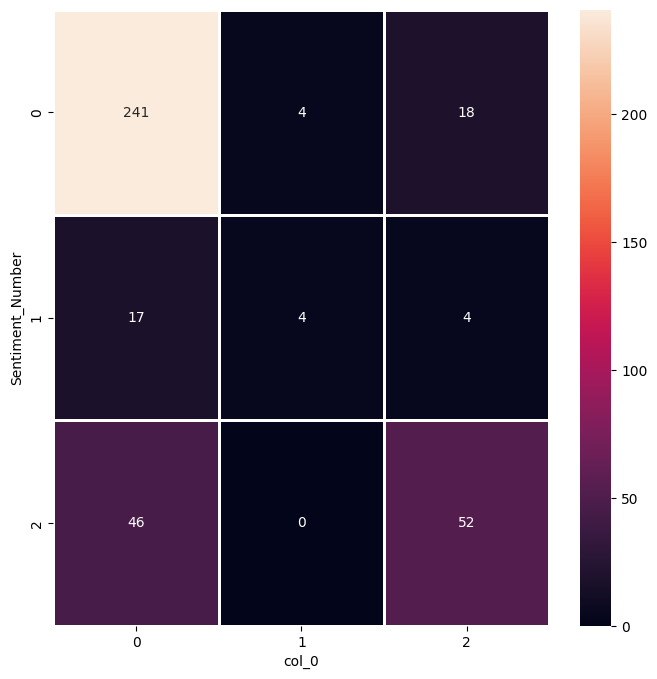

In [30]:
cf_matrix = pd.crosstab(y_test,y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cf_matrix, linewidths=1, annot=True, ax=ax, fmt='g')

In [31]:
cvResults = pd.DataFrame(grid_search.cv_results_)
cvResultsInf = cvResults[['param_svm__C', 'param_svm__gamma', 'param_svm__kernel', 'param_tfidf__ngram_range', 'param_tfidf__max_features', 'mean_train_score', 'mean_test_score', 'std_test_score', 'rank_test_score']]
cvResultsInf.sort_values(by='mean_test_score', ascending=False).head(20)

param_svm__C param_svm__gamma param_svm__kernel param_tfidf__ngram_range  \
256           10                1               rbf                   (1, 2)   
301          100             0.01               rbf                   (1, 2)   
400          100                1               rbf                   (1, 2)   
219           10              0.1           sigmoid                   (1, 1)   
206           10              0.1               rbf                   (1, 3)   
315          100             0.01           sigmoid                   (1, 1)   
51             1              0.1            linear                   (1, 1)   
3              1             0.01            linear                   (1, 1)   
259           10                1               rbf                   (1, 2)   
99             1                1            linear                   (1, 1)   
302          100             0.01               rbf                   (1, 3)   
318          100             0.01           sigmoid                   (1, 1)   
102            1                1            linear                   (1, 1)   
54             1              0.1            linear                   (1, 1)   
222           10              0.1           sigmoid                   (1, 1)   
6              1             0.01            linear                   (1, 1)   
396          100                1               rbf                   (1, 1)   
205           10              0.1               rbf                   (1, 2)   
9              1             0.01            linear                   (1, 1)   
225           10              0.1           sigmoid                   (1, 1)   

    param_tfidf__max_features  mean_train_score  mean_test_score  \
256                      1000          0.992857         0.787662   
301                      None          0.992857         0.785714   
400                      1000          0.993795         0.784416   
219                      1000          0.881746         0.784416   
206                      None          0.994012         0.784416   
315                      1000          0.882756         0.783766   
51                       1000          0.882756         0.783766   
3                        1000          0.882756         0.783766   
259                      2000          0.995815         0.783766   
99                       1000          0.882756         0.783766   
302                      None          0.994012         0.783766   
318                      2000          0.903680         0.783117   
102                      2000          0.903752         0.783117   
54                       2000          0.903752         0.783117   
222                      2000          0.903391         0.783117   
6                        2000          0.903752         0.783117   
396                      None          0.999351         0.782468   
205                      None          0.992785         0.782468   
9                        3000          0.914935         0.781818   
225                      3000          0.914502         0.781818   

     std_test_score  rank_test_score  
256        0.027710                1  
301        0.019481                2  
400        0.032311                3  
219        0.021300                4  
206        0.018549                4  
315        0.022126                6  
51         0.022126                6  
3          0.022126                6  
259        0.018831                6  
99         0.022126                6  
302        0.016440               11  
318        0.021379               12  
102        0.021379               12  
54         0.021379               12  
222        0.021379               12  
6          0.021379               12  
396        0.025191               17  
205        0.021191               17  
9          0.021379               19  
225        0.021379               19

In [32]:
cvResults.to_csv('Model_Report.csv', sep=',', index=False)

Most frequent words in the predicted test data for the '0' label: ['ekonomi', 'resesi', 'resesi ekonomi', 'indonesia', 'global', 'ancam', 'ancam resesi', 'ekonomi global', 'dunia', 'ekonomi indonesia', 'hadap', 'gelap', 'ekonomi dunia', 'negara', 'krisis', 'resesi global', 'usaha', 'isu', 'tumbuh', 'hadap resesi']
ekonomi 215
resesi 778
resesi ekonomi 787
indonesia 359
global 289
ancam 34
ancam resesi 37
ekonomi global 226
dunia 201
ekonomi indonesia 229
hadap 309
gelap 273
ekonomi dunia 223
negara 621
krisis 508
resesi global 789
usaha 978
isu 407
tumbuh 953
hadap resesi 313


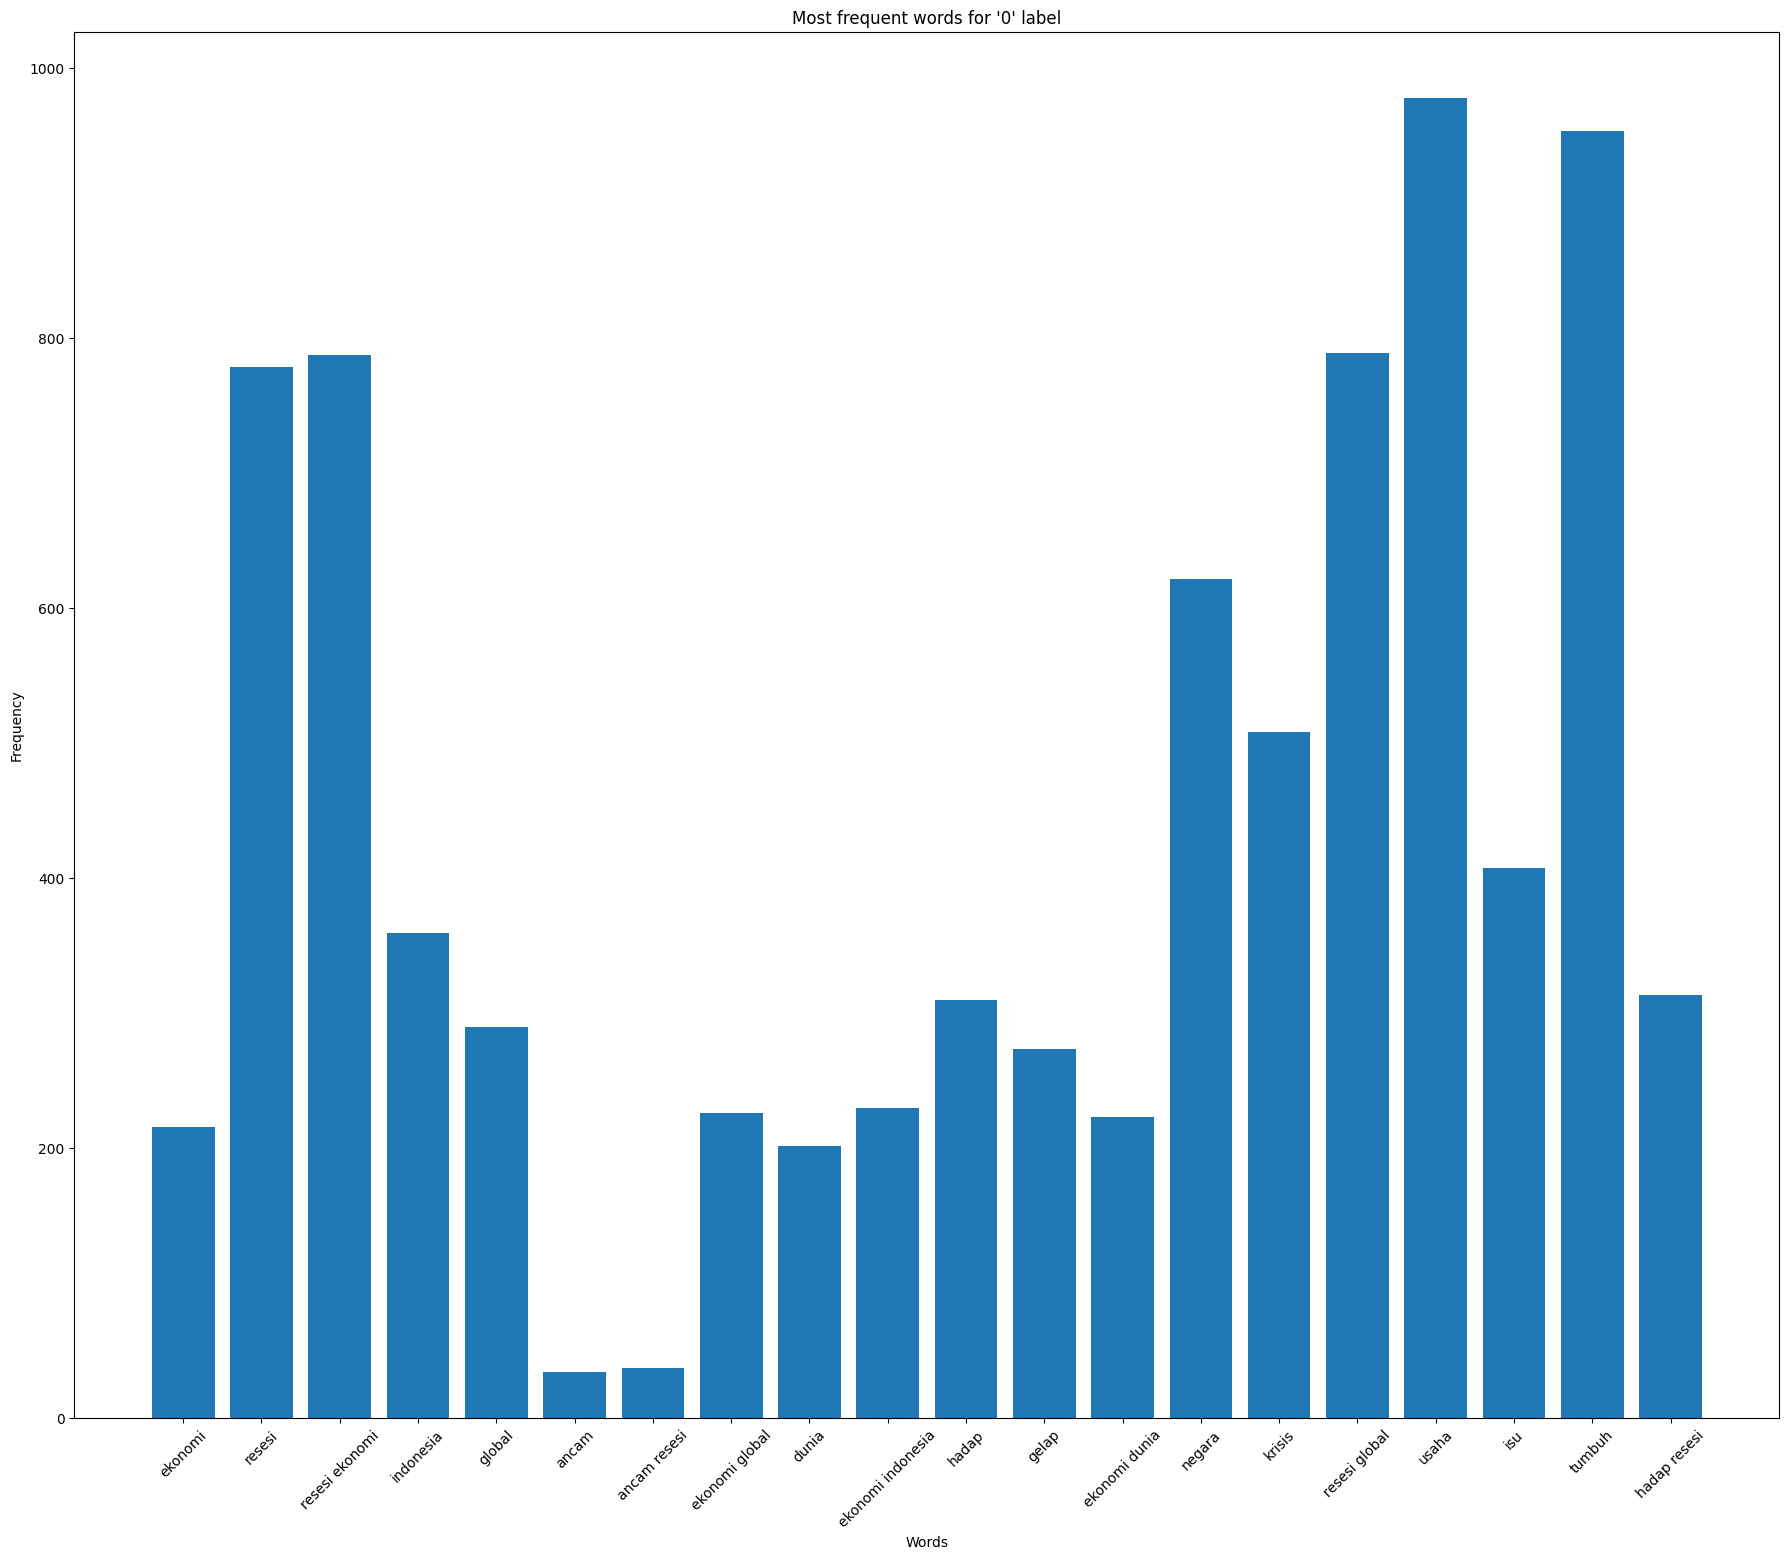

Most frequent words in the predicted test data for the '2' label: ['indonesia', 'ekonomi', 'resesi', 'ekonomi indonesia', 'tumbuh', 'negara', 'resesi ekonomi', 'hadap', 'kuat', 'tumbuh ekonomi', 'global', 'optimis', 'usaha', 'milik', 'milik negara', 'usaha milik', 'badan usaha', 'badan', 'indonesia tumbuh', 'dunia']
indonesia 359
ekonomi 215
resesi 778
ekonomi indonesia 229
tumbuh 953
negara 621
resesi ekonomi 787
hadap 309
kuat 515
tumbuh ekonomi 956
global 289
optimis 648
usaha 978
milik 595
milik negara 596
usaha milik 980
badan usaha 67
badan 66
indonesia tumbuh 380
dunia 201


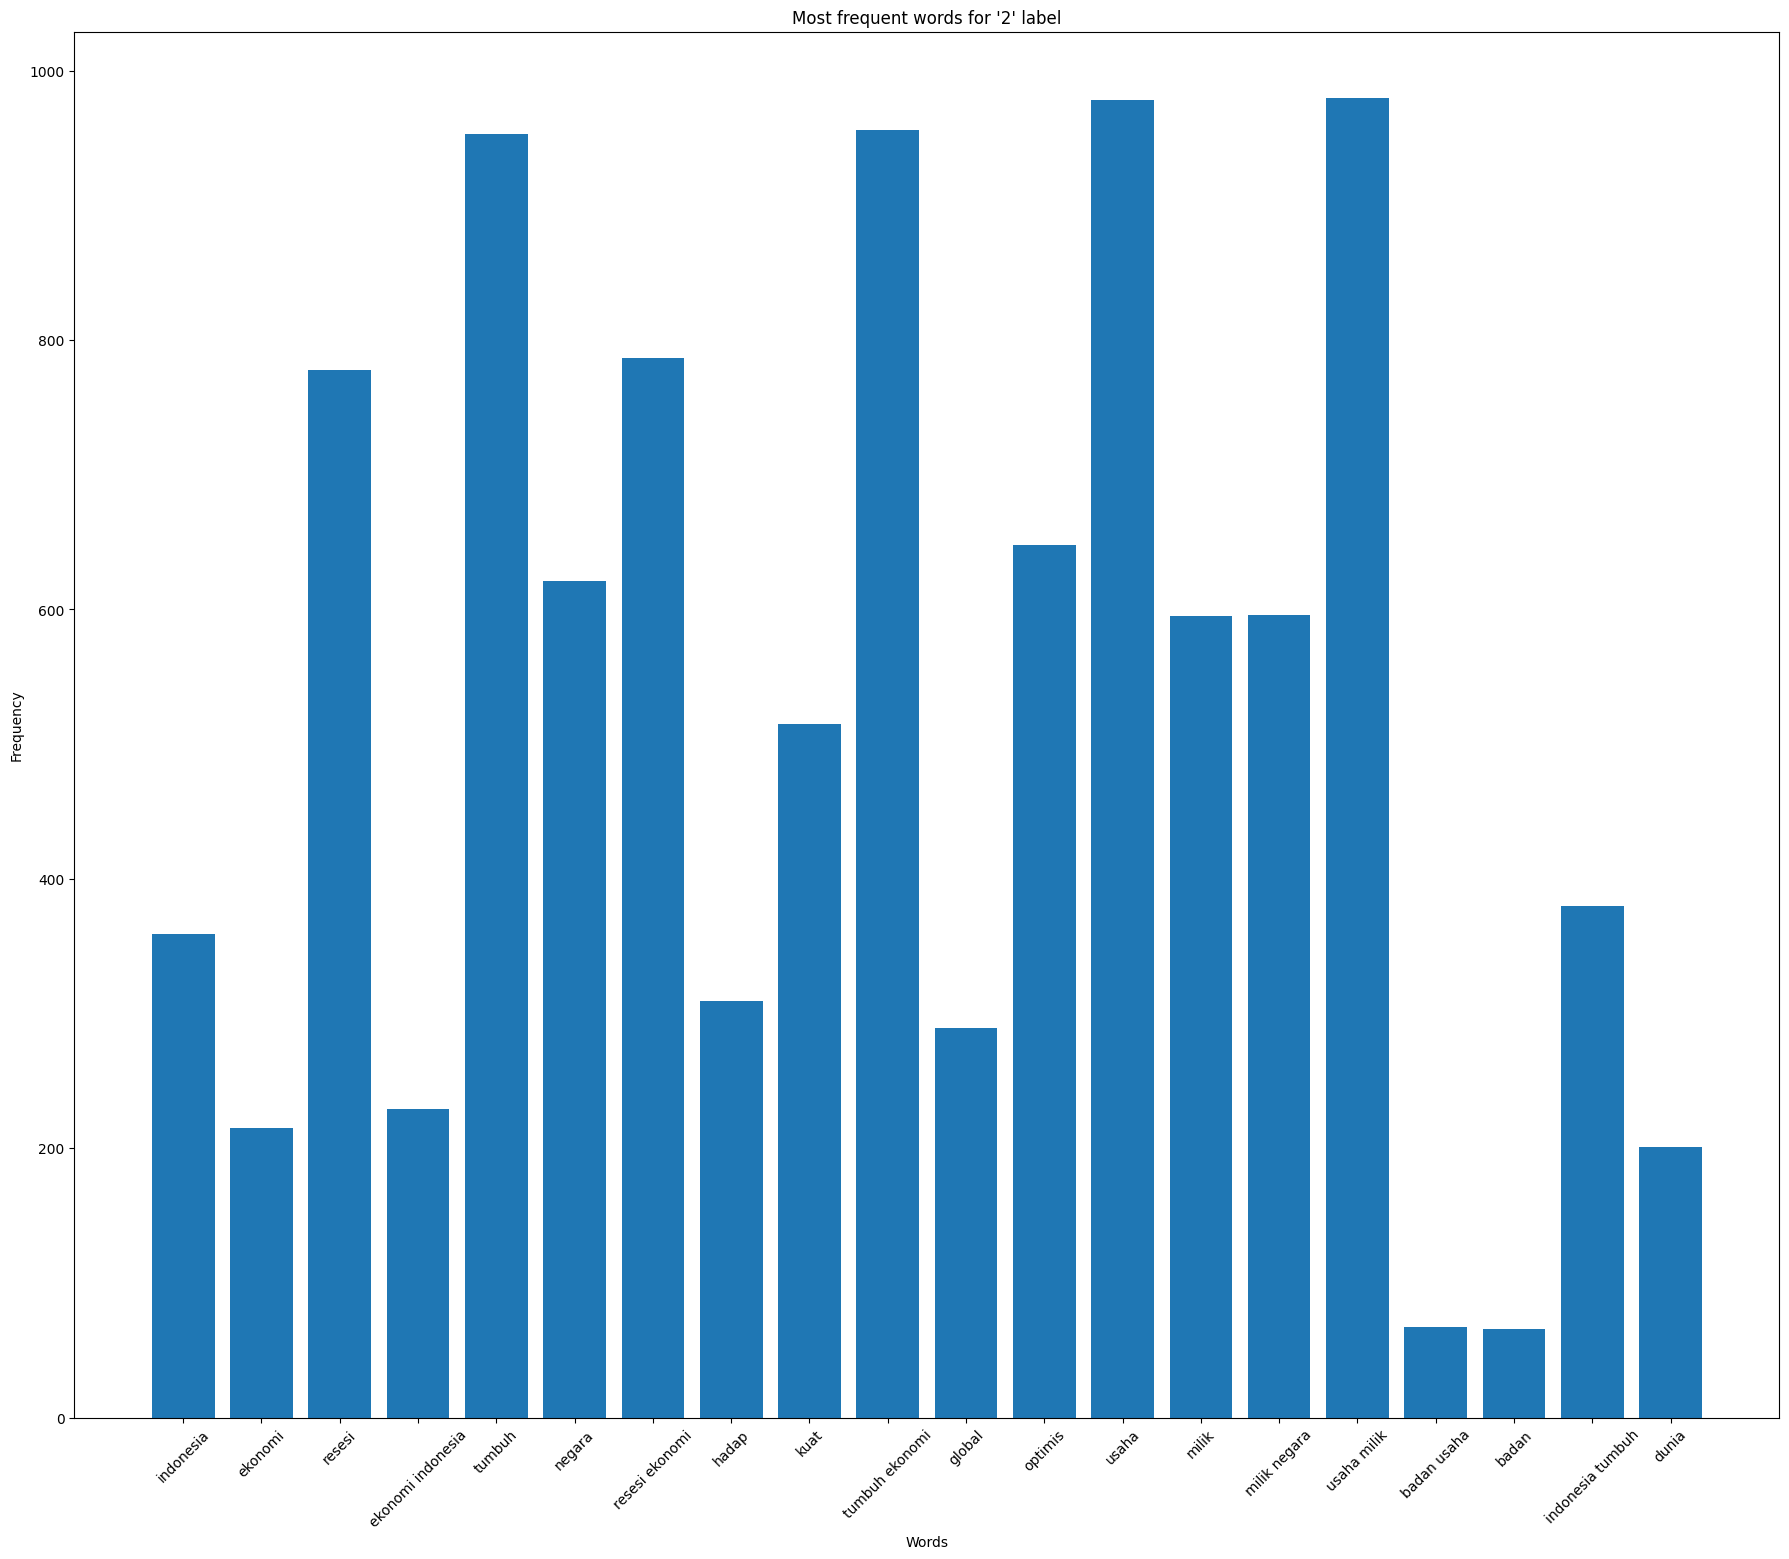

Most frequent words in the predicted test data for the '1' label: ['indonesia', 'ekonomi', 'aman', 'resesi', 'resesi ekonomi', 'ancam resesi', 'ancam', 'ramal', 'hadap', 'global', 'dunia resesi', 'bangun', 'dunia', 'indonesia aman', 'industri', 'tanda', 'ekonomi indonesia', 'indonesia resesi', 'ekonomi global', 'stagflasi']
indonesia 359
ekonomi 215
aman 22
resesi 778
resesi ekonomi 787
ancam resesi 37
ancam 34
ramal 771
hadap 309
global 289
dunia resesi 211
bangun 81
dunia 201
indonesia aman 361
industri 383
tanda 909
ekonomi indonesia 229
indonesia resesi 377
ekonomi global 226
stagflasi 880


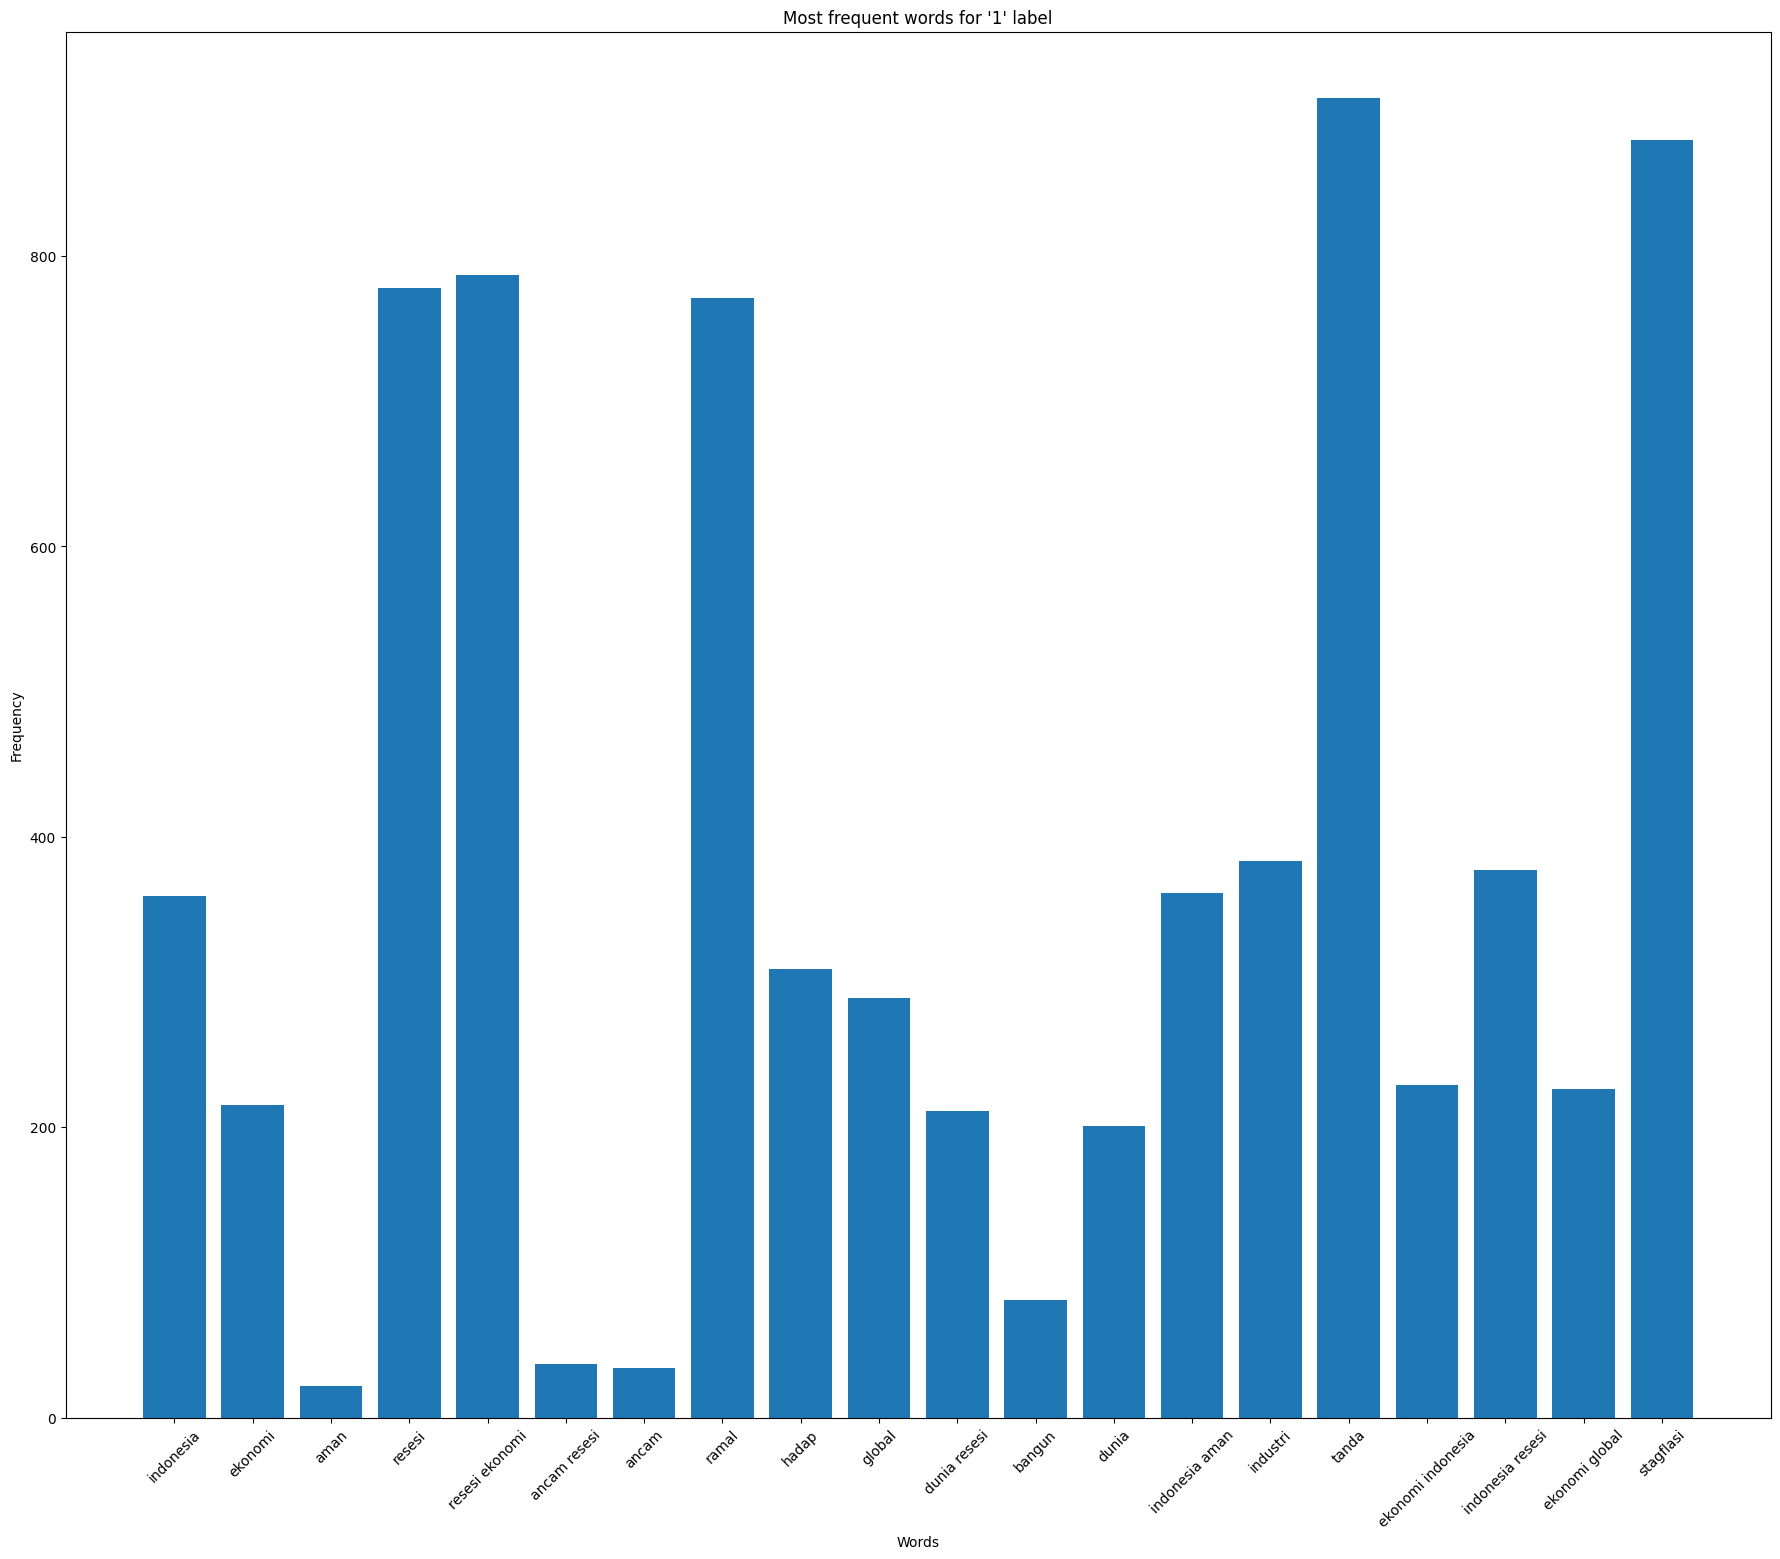

In [47]:
for label in df['Sentiment_Number'].unique():
    vectorizer = grid_search.best_estimator_.named_steps['tfidf']
    indices = (-vectorizer.transform(X_test[y_test == label]).sum(axis=0)).argsort()
    features = vectorizer.get_feature_names_out()
    top_n = 20
    top_features = [features[i] for i in indices.tolist()[0][:top_n]]
    print(f"Most frequent words in the predicted test data for the '{label}' label: {top_features}")
    for i in indices.tolist()[0][:top_n] : 
        print(features[i], i)
    plt.figure(figsize=(22,18))
    plt.bar(top_features, indices.tolist()[0][:top_n])
    plt.title(f"Most frequent words for '{label}' label")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()

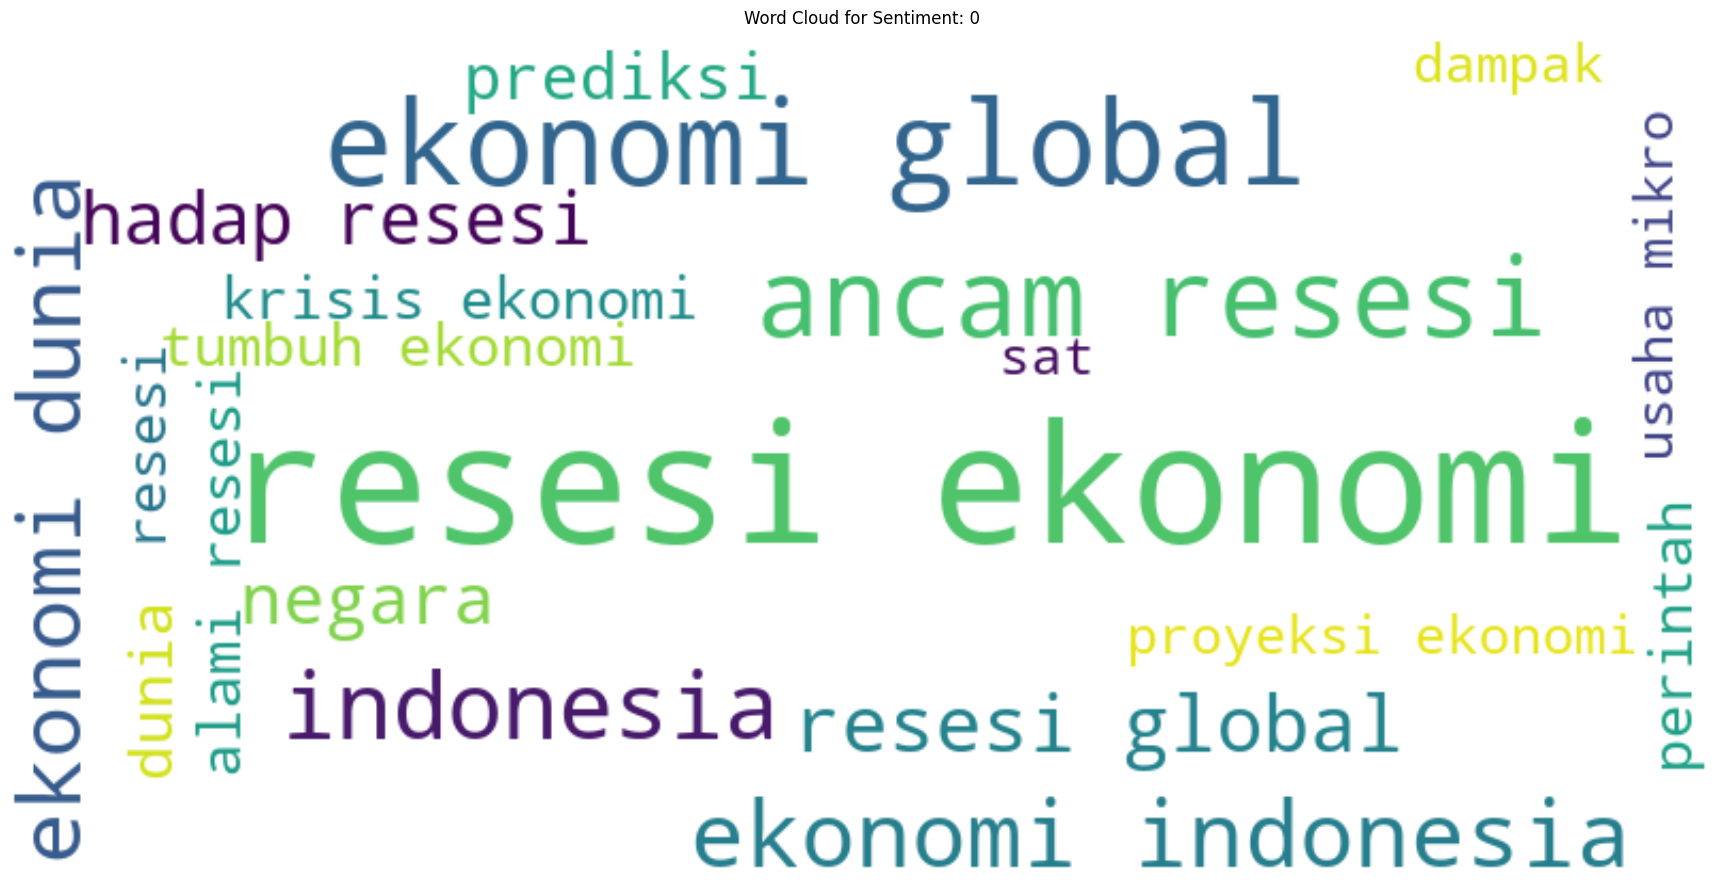

Top features for sentiment 0: ekonomi, resesi, resesi ekonomi, global, indonesia, dunia, ancam, ekonomi global, ancam resesi, hadap, ekonomi dunia, ekonomi indonesia, dampak, krisis, prediksi, negara, gelap, resesi global, akibat, tumbuh


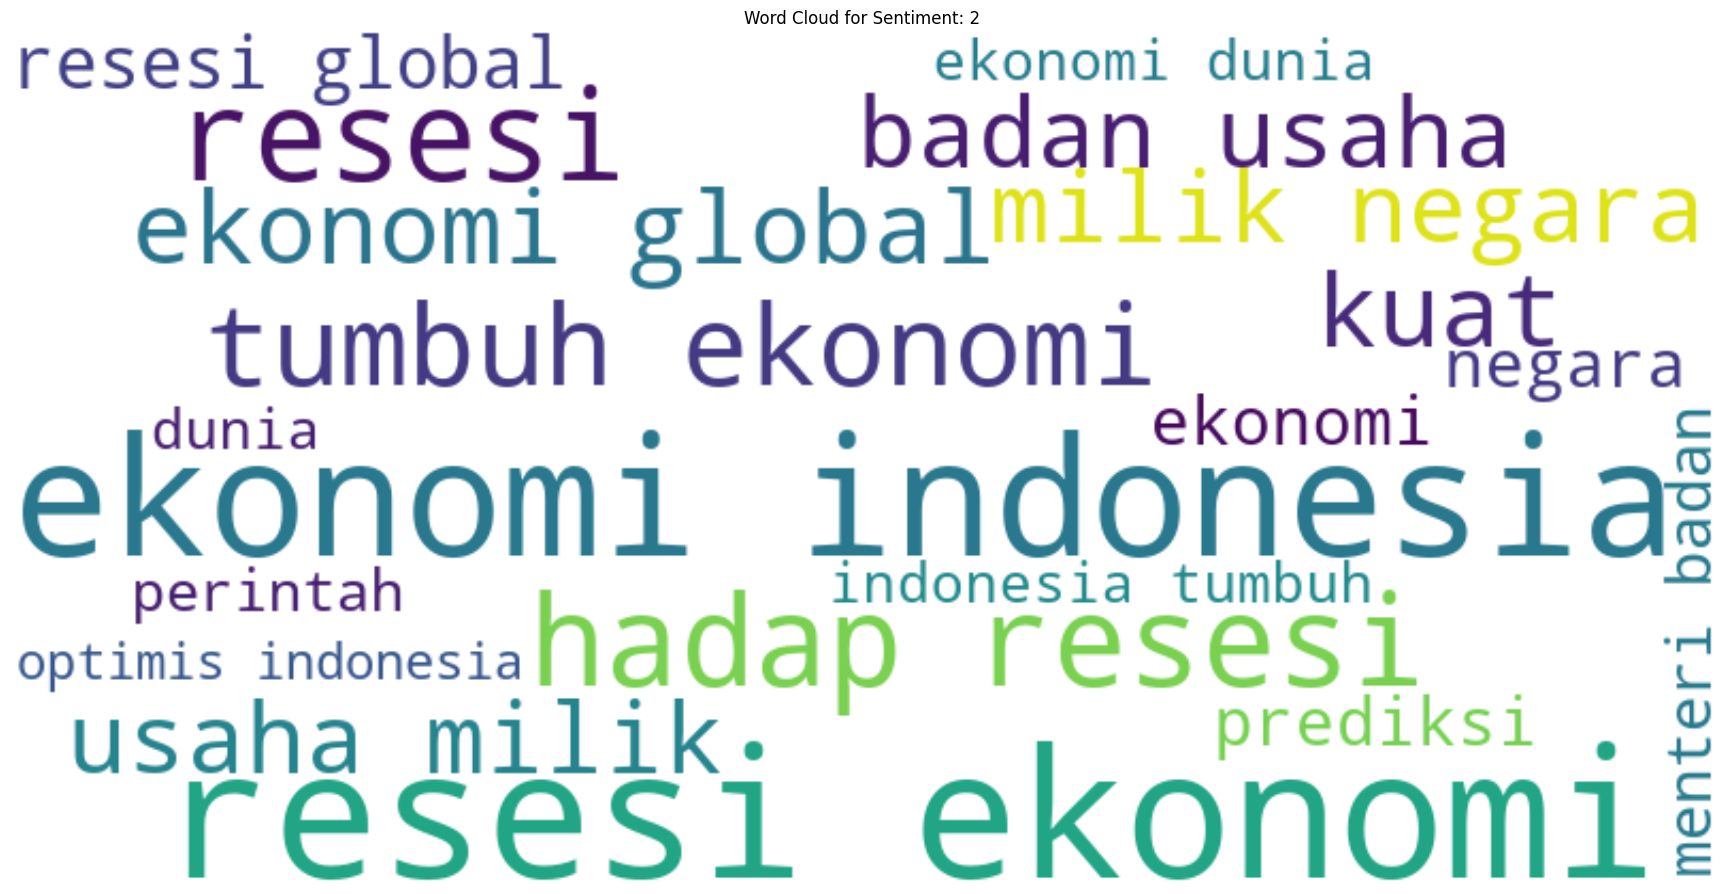

Top features for sentiment 2: indonesia, ekonomi, resesi, ekonomi indonesia, tumbuh, negara, resesi ekonomi, hadap, kuat, usaha, hadap resesi, global, optimis, tumbuh ekonomi, milik, menteri, usaha milik, badan usaha, badan, milik negara


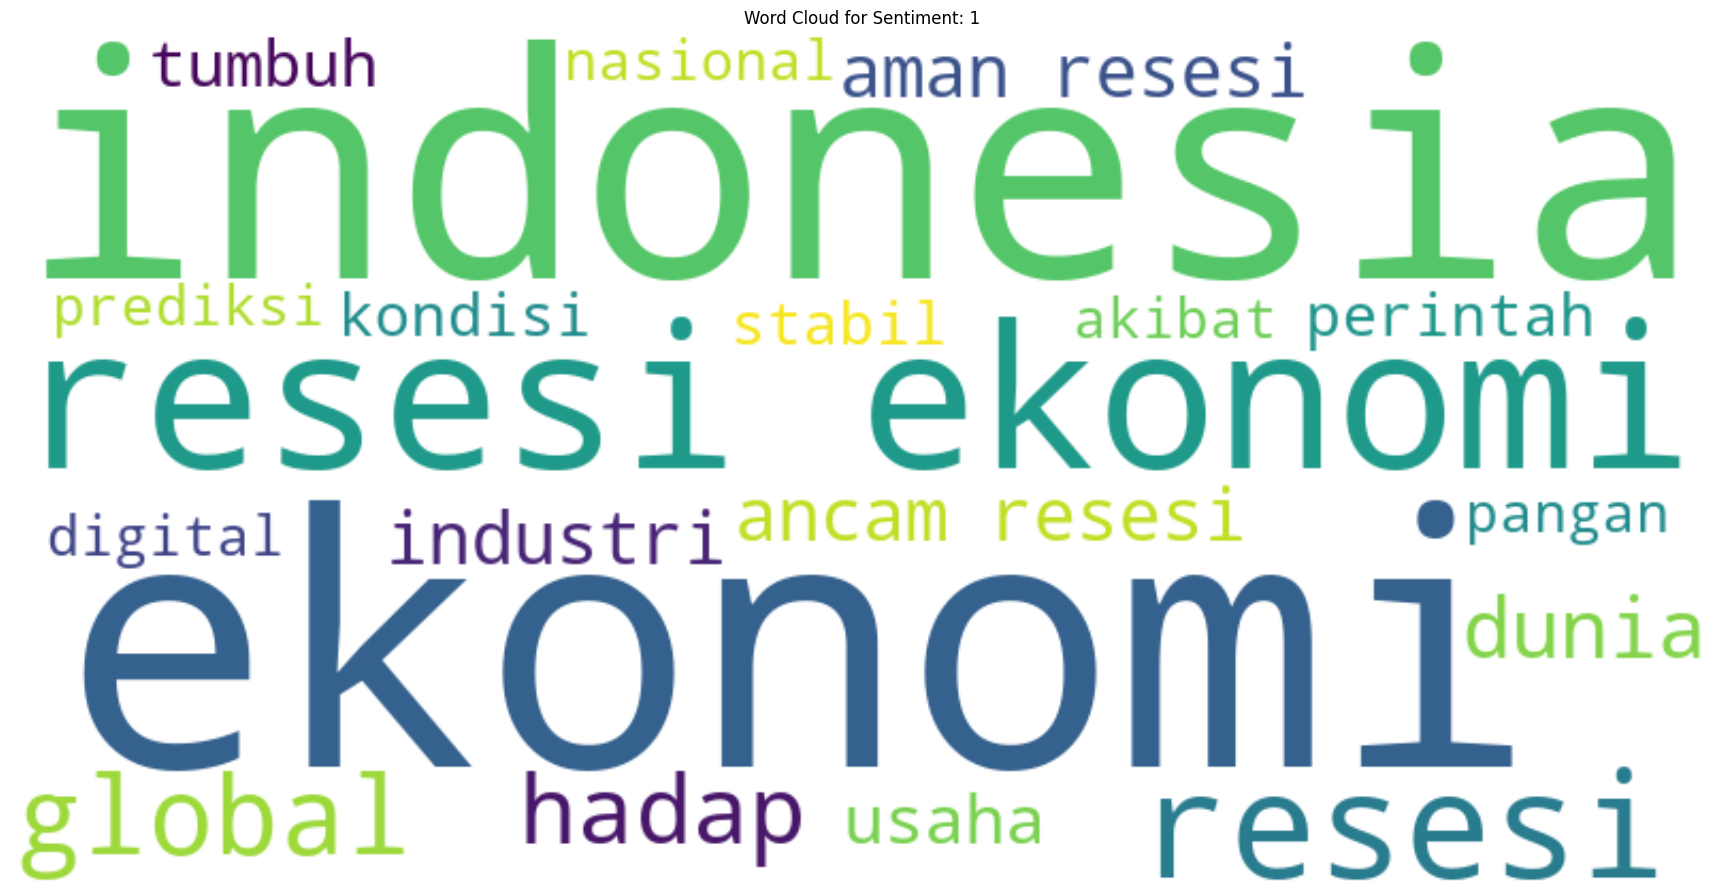

Top features for sentiment 1: indonesia, ekonomi, resesi, resesi ekonomi, aman, aman resesi, global, industri, hadap, ekonomi indonesia, dunia, ekonomi global, stabil, indonesia aman, usaha, digital, ancam resesi, hadap resesi, nasional, tanda


In [56]:
# Initialize an empty string to store text for each sentiment
sentiments_text = {}

# Loop through unique sentiment labels
for label in df['Sentiment_Number'].unique():
    # Get the best vectorizer from the grid search results
    vectorizer = grid_search.best_estimator_.named_steps['tfidf']
    
    # Filter the DataFrame for the specific sentiment label
    sentiment_df = df[df['Sentiment_Number'] == label]
    
    # Join all text data for the sentiment label
    text = " ".join(sentiment_df['Clean_Sentence'])  # Replace 'Text' with the actual column name
    
    # Transform the text using the best vectorizer
    transformed_text = vectorizer.transform([text])
    
    # Get feature names from the vectorizer
    features = vectorizer.get_feature_names_out()
    
    # Get the indices of the top N features
    indices = (-transformed_text.sum(axis=0)).argsort()
    top_n = 20
    top_features = [features[i] for i in indices.tolist()[0][:top_n]]
    
    # Store the sentiment text and top features
    sentiments_text[label] = {
        'text': text,
        'top_features': top_features
    }

# Generate and display Word Clouds for each sentiment
for label, data in sentiments_text.items():
    wordcloud = WordCloud(width=800, height=400, max_words=20, background_color='white').generate(data['text'])

    plt.figure(figsize=(22, 18))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for Sentiment: {label}")
    plt.axis('off')
    plt.show()

    # Print the top features
    print(f"Top features for sentiment {label}: {', '.join(data['top_features'])}")
    

In [40]:
tfidf_vectorizer = grid_search.best_estimator_.named_steps['tfidf']
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [41]:
tf_idf_array = X_train_tfidf.toarray()
words_set = tfidf_vectorizer.get_feature_names_out()
df_tf_idf = pd.DataFrame(tf_idf_array, columns = words_set)
df_tf_idf.head(10)

acu  adan  ahli  air  airlanga  airlanga ekonomi  airlanga hartarto  ajak  \
0  0.0   0.0   0.0  0.0       0.0               0.0                0.0   0.0   
1  0.0   0.0   0.0  0.0       0.0               0.0                0.0   0.0   
2  0.0   0.0   0.0  0.0       0.0               0.0                0.0   0.0   
3  0.0   0.0   0.0  0.0       0.0               0.0                0.0   0.0   
4  0.0   0.0   0.0  0.0       0.0               0.0                0.0   0.0   
5  0.0   0.0   0.0  0.0       0.0               0.0                0.0   0.0   
6  0.0   0.0   0.0  0.0       0.0               0.0                0.0   0.0   
7  0.0   0.0   0.0  0.0       0.0               0.0                0.0   0.0   
8  0.0   0.0   0.0  0.0       0.0               0.0                0.0   0.0   
9  0.0   0.0   0.0  0.0       0.0               0.0                0.0   0.0   

   ajar  akhirakhir  ...  waspada resesi  wib  widodo  widodo dunia  wkwk  \
0   0.0         0.0  ...             0.0  0.0     0.0           0.0   0.0   
1   0.0         0.0  ...             0.0  0.0     0.0           0.0   0.0   
2   0.0         0.0  ...             0.0  0.0     0.0           0.0   0.0   
3   0.0         0.0  ...             0.0  0.0     0.0           0.0   0.0   
4   0.0         0.0  ...             0.0  0.0     0.0           0.0   0.0   
5   0.0         0.0  ...             0.0  0.0     0.0           0.0   0.0   
6   0.0         0.0  ...             0.0  0.0     0.0           0.0   0.0   
7   0.0         0.0  ...             0.0  0.0     0.0           0.0   0.0   
8   0.0         0.0  ...             0.0  0.0     0.0           0.0   0.0   
9   0.0         0.0  ...             0.0  0.0     0.0           0.0   0.0   

   world  world bank  wujud  yakin  yuk  
0    0.0         0.0    0.0    0.0  0.0  
1    0.0         0.0    0.0    0.0  0.0  
2    0.0         0.0    0.0    0.0  0.0  
3    0.0         0.0    0.0    0.0  0.0  
4    0.0         0.0    0.0    0.0  0.0  
5    0.0         0.0    0.0    0.0  0.0  
6    0.0         0.0    0.0    0.0  0.0  
7    0.0         0.0    0.0    0.0  0.0  
8    0.0         0.0    0.0    0.0  0.0  
9    0.0         0.0    0.0    0.0  0.0  

[10 rows x 1000 columns]

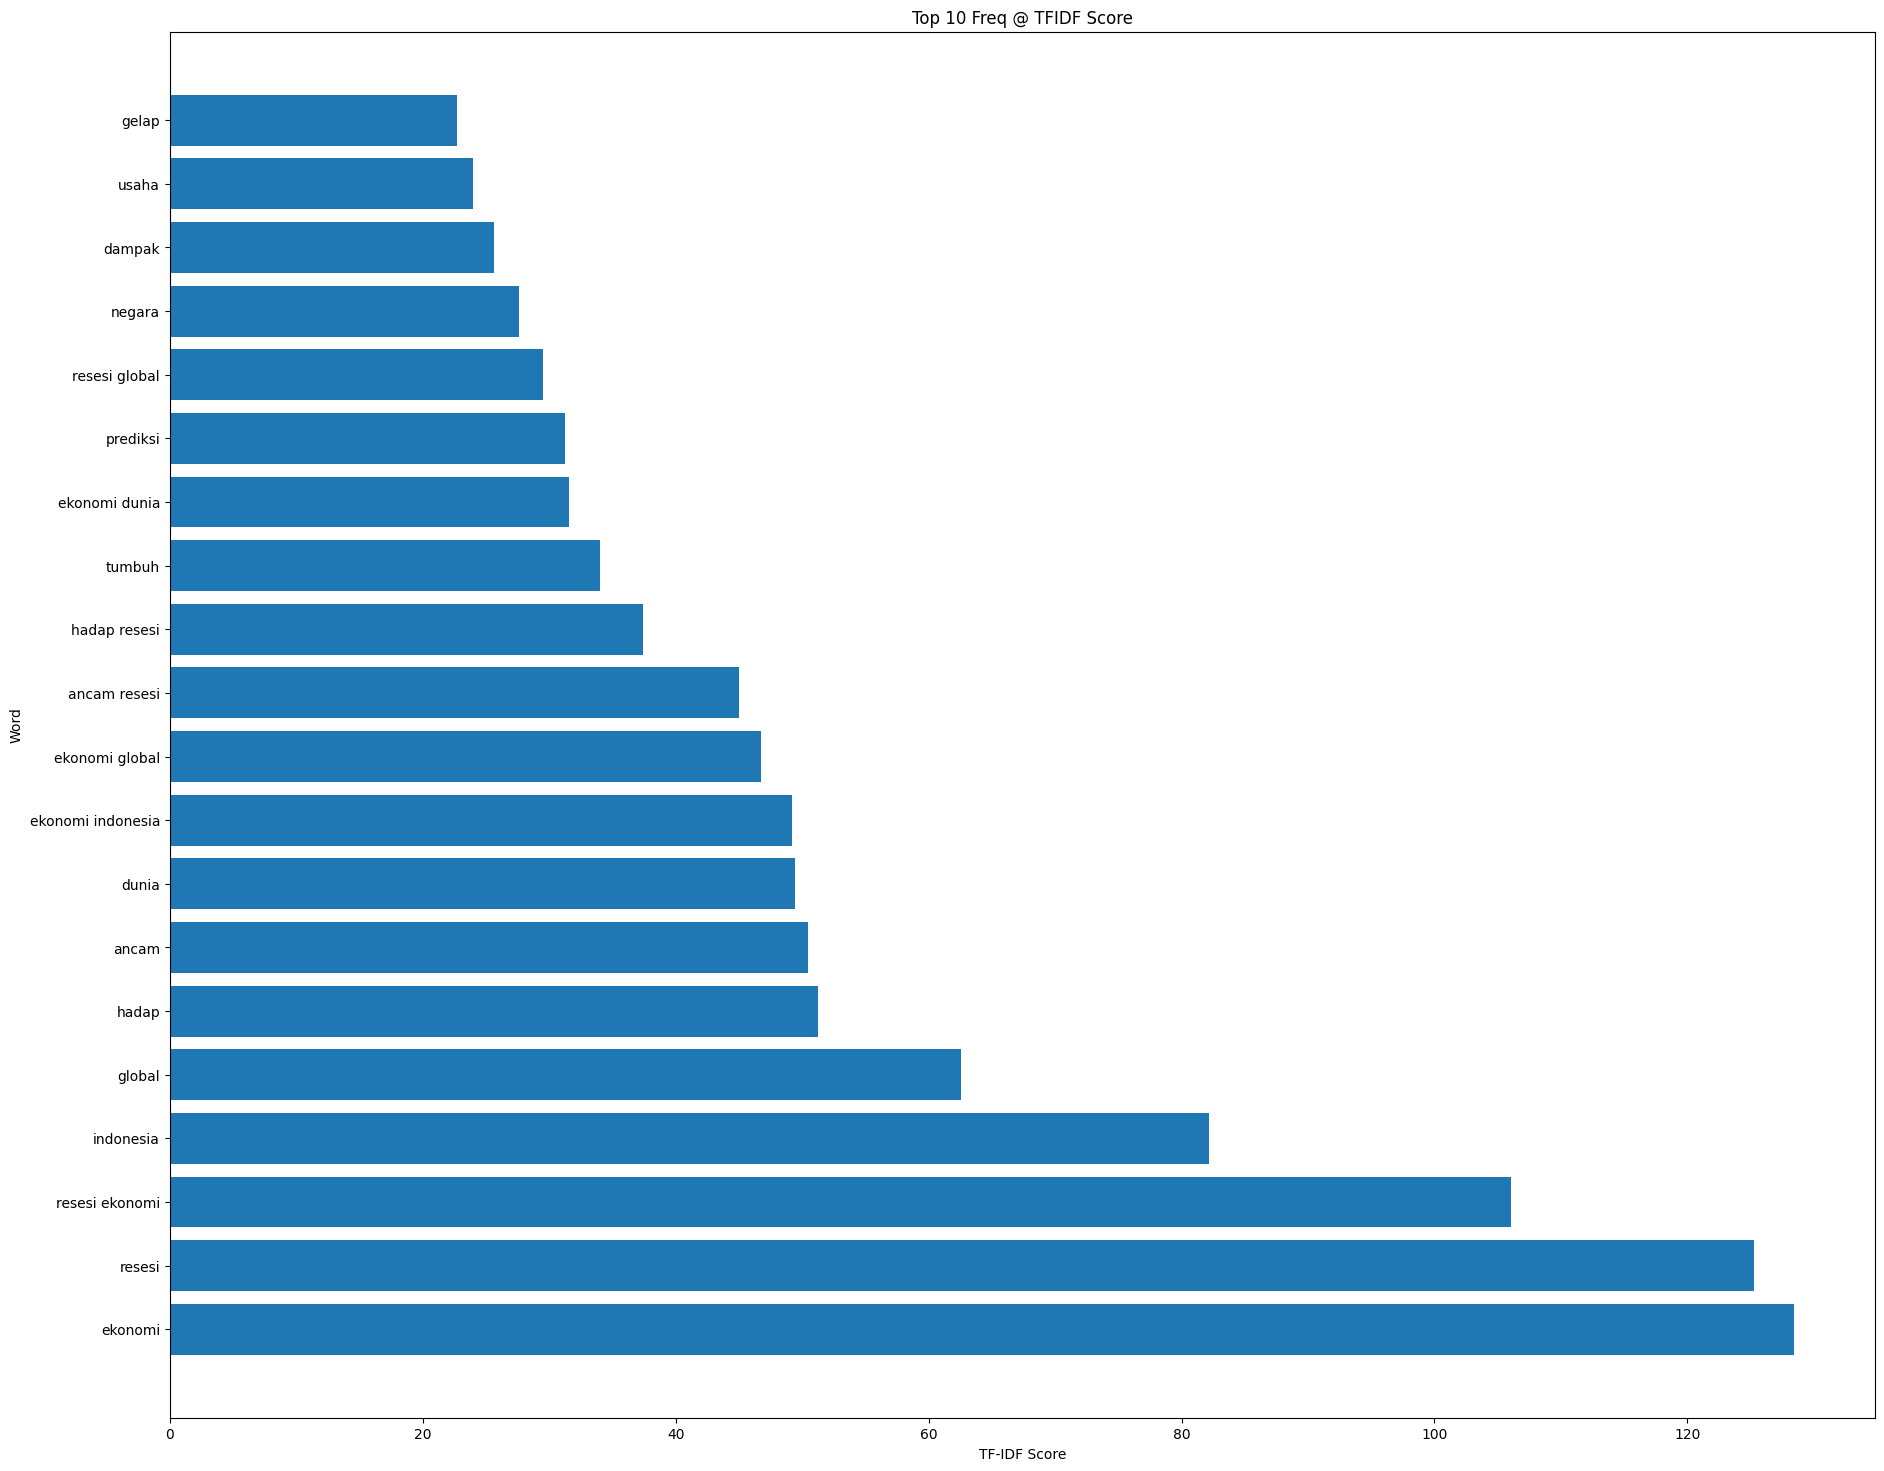

In [46]:
# Visualize the TF-IDF most frequent words
freqs = [(word, tf_idf_array[:,idx].sum()) for idx, word in enumerate(words_set)]
freqs_sorted = sorted(freqs, key=lambda x: -x[1])

top_words = freqs_sorted[:20]
top_words_df = pd.DataFrame(top_words, columns=['word', 'tfidf'])

plt.figure(figsize=(22,18))
plt.barh(top_words_df['word'], top_words_df['tfidf'])
plt.title('Top 10 Freq @ TFIDF Score')
plt.xlabel('TF-IDF Score')
plt.ylabel('Word')
plt.show()


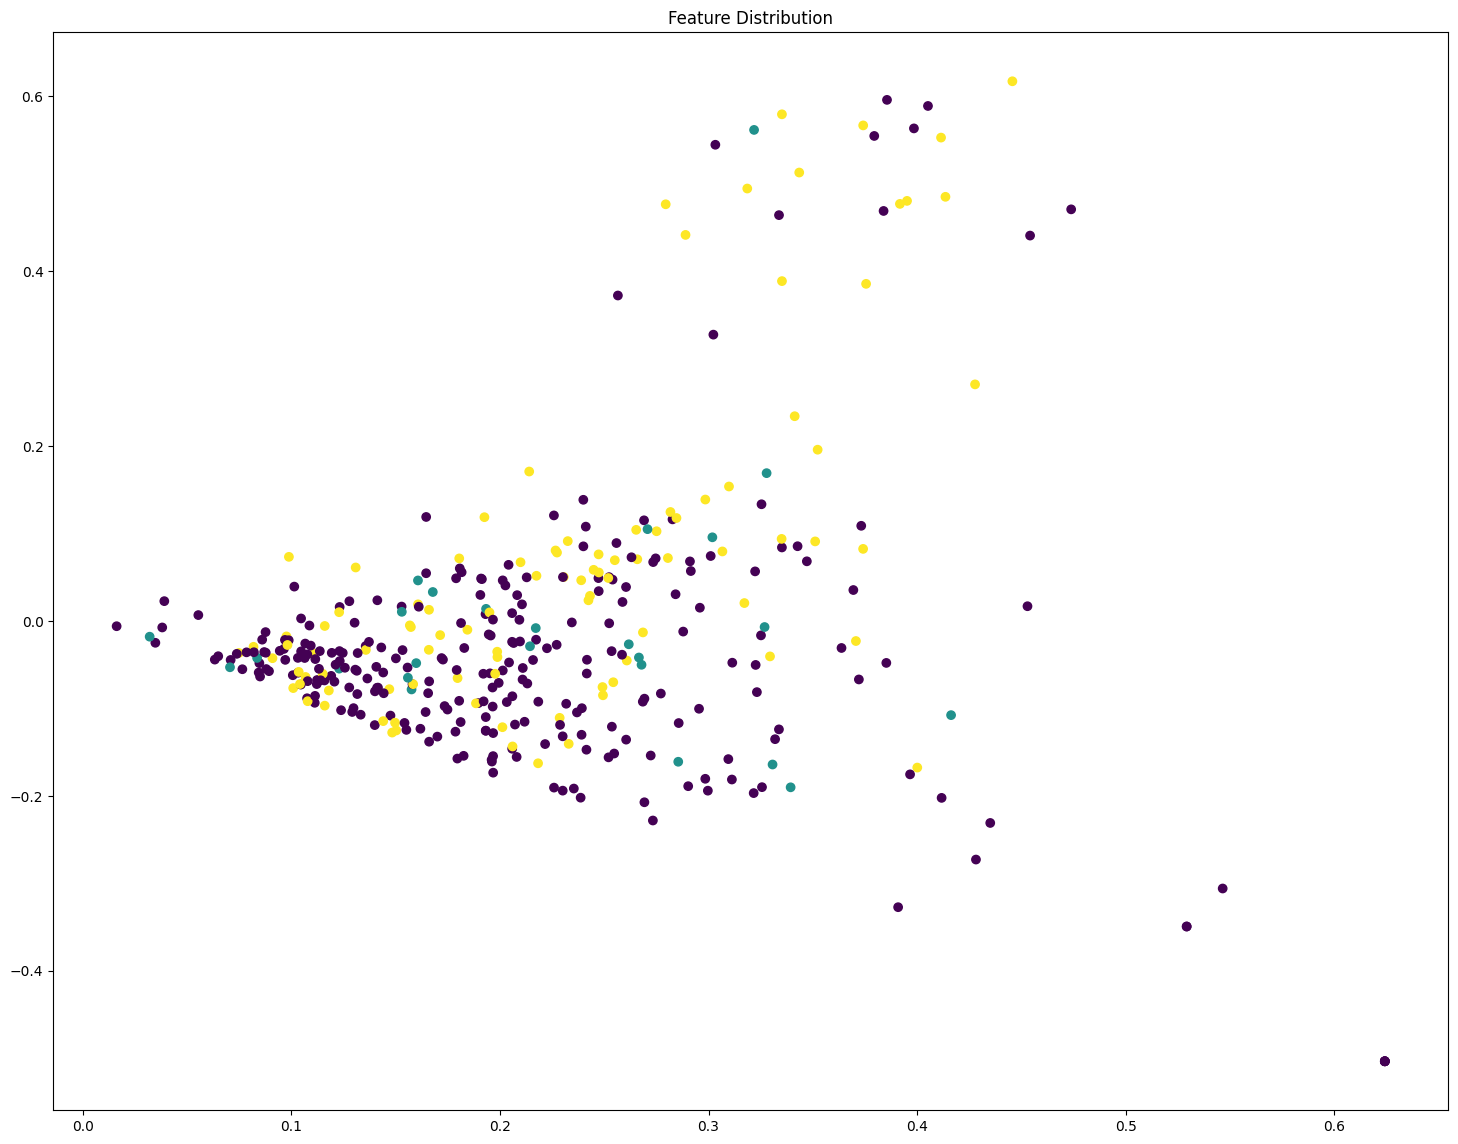

In [44]:
svd = TruncatedSVD(n_components=2)
X_train_svd = svd.fit_transform(X_test_tfidf)
plt.figure(figsize=(18,14))
plt.scatter(X_train_svd[:, 0], X_train_svd[:, 1], c=y_test)
plt.title("Feature Distribution")
plt.show()

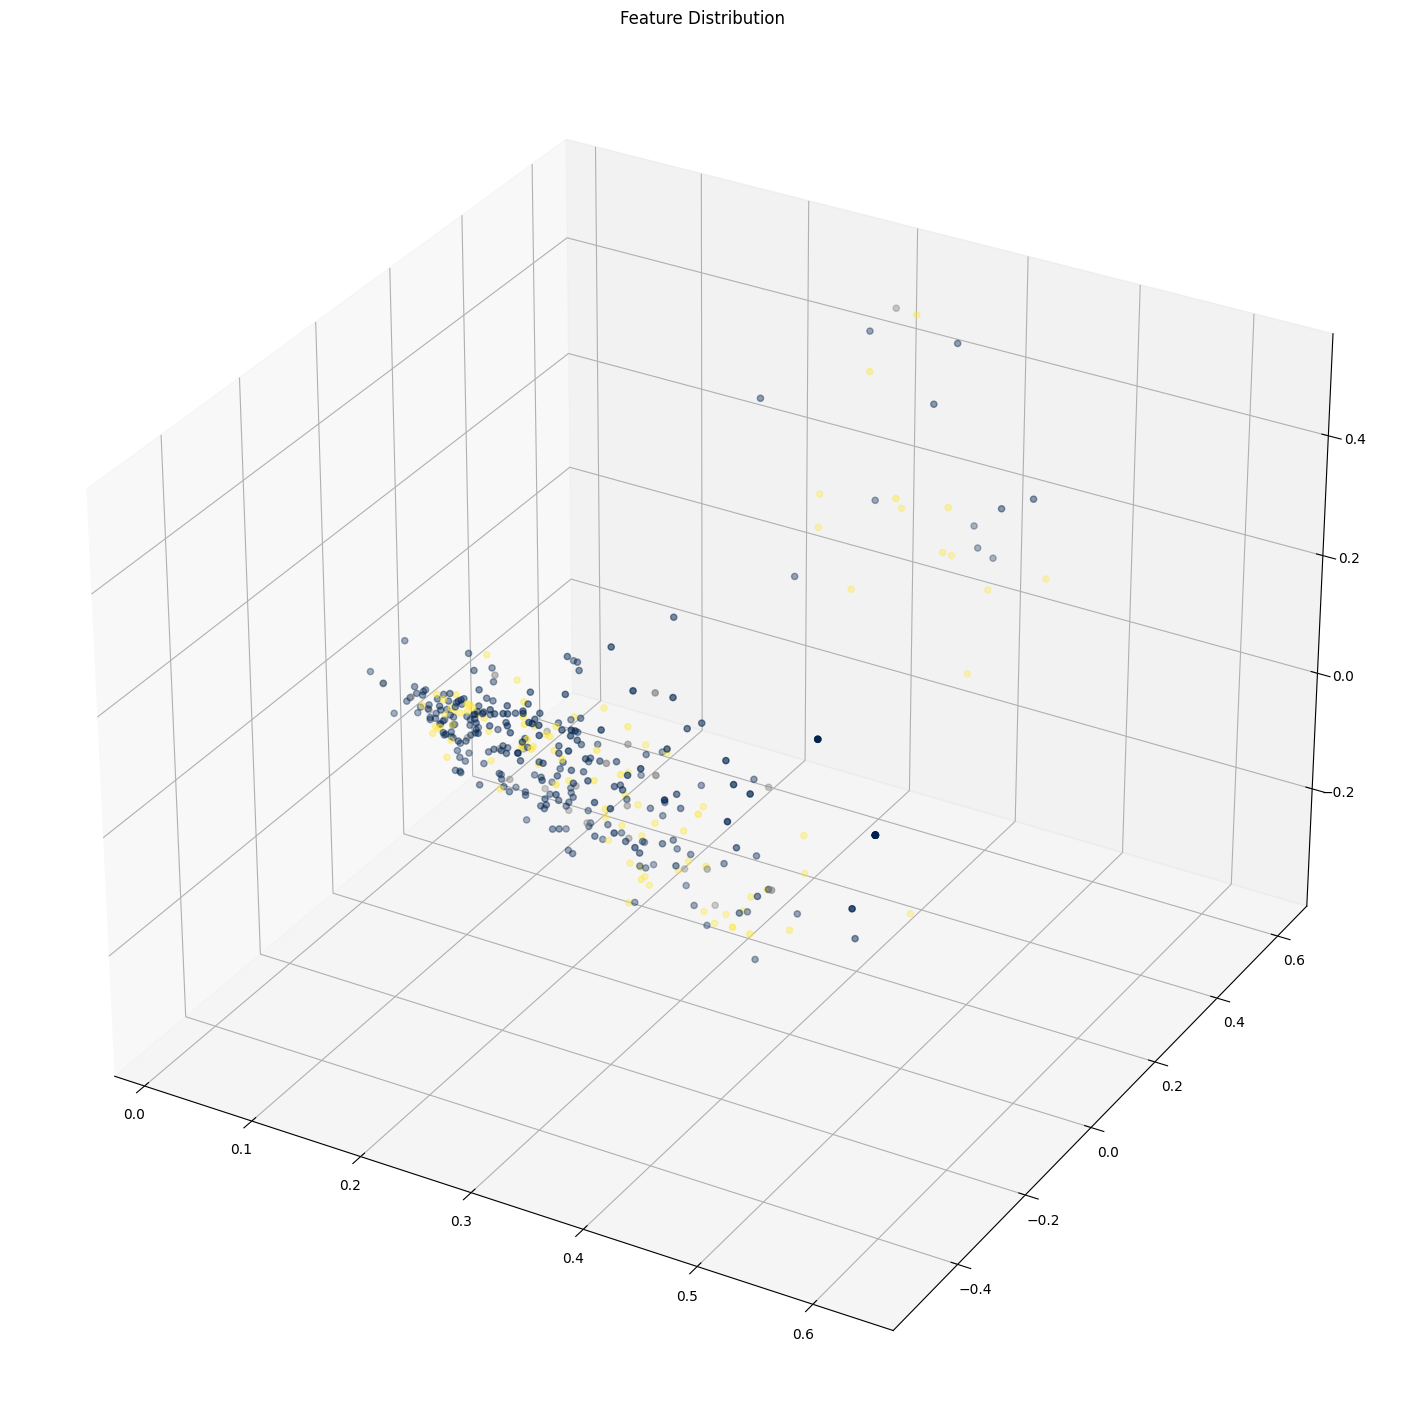

In [45]:
svd3 = TruncatedSVD(n_components=3)

X_transformed = svd3.fit_transform(X_test_tfidf)

fig = plt.figure(figsize=(22, 18))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_transformed[:, 0], X_transformed[:, 1], X_transformed[:, 2], c=y_test, cmap=plt.cm.cividis)
ax.set_title("Feature Distribution")
plt.show()


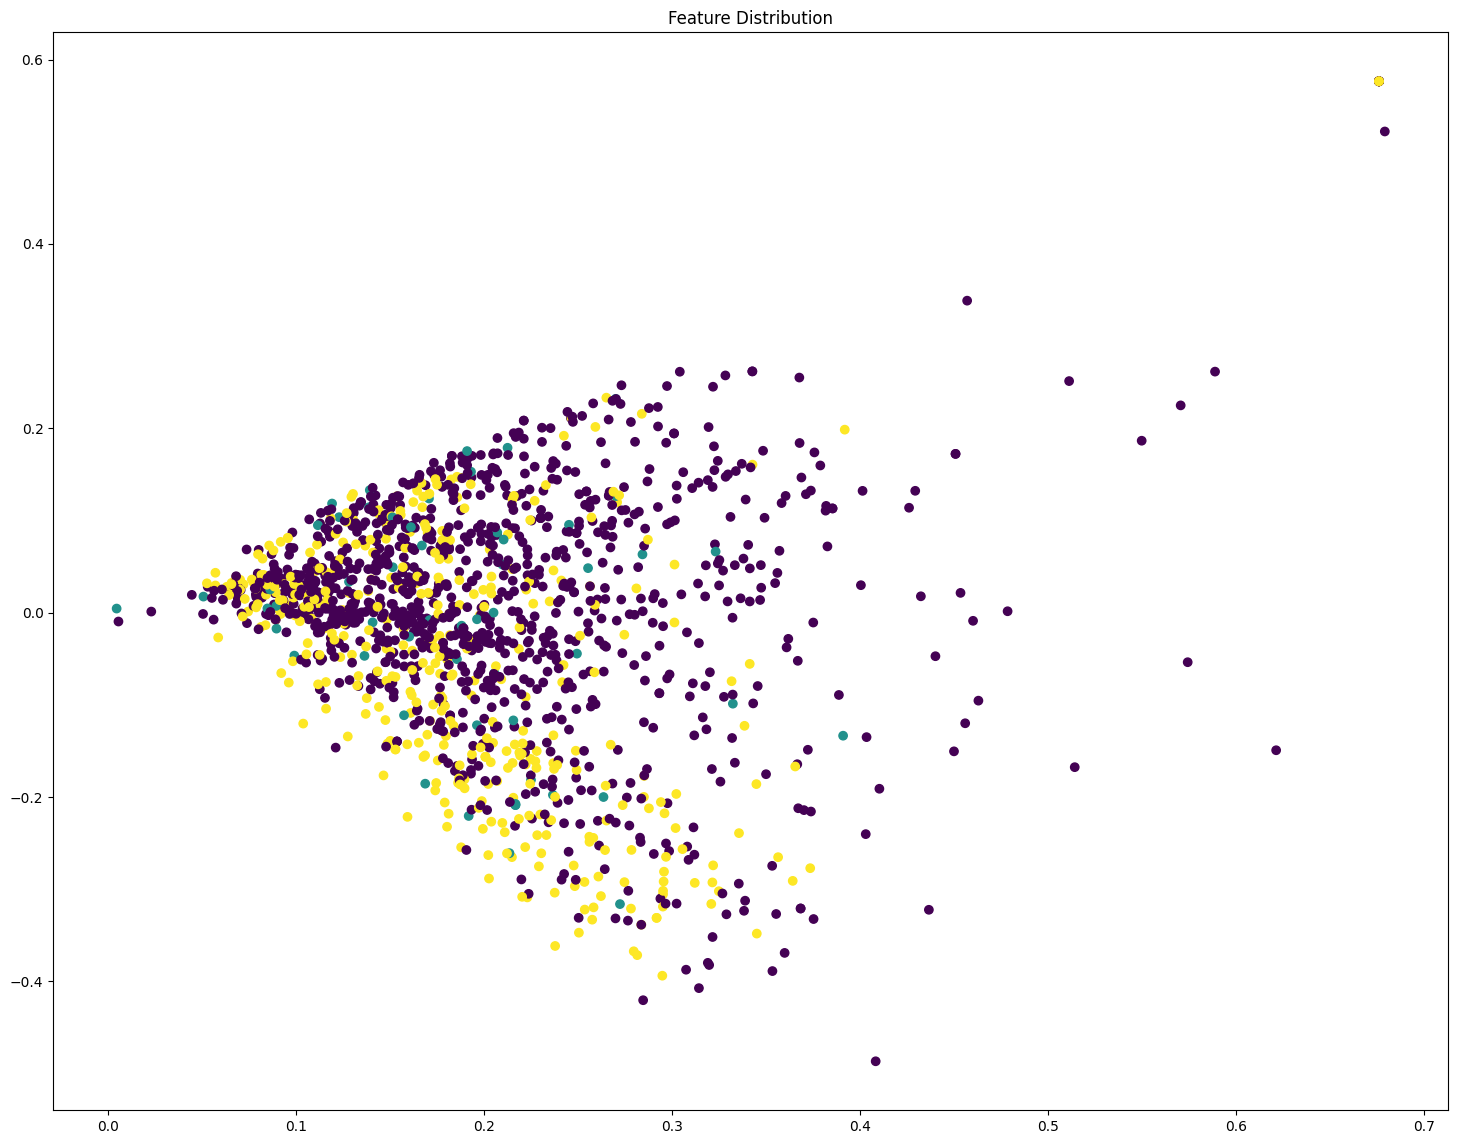

In [48]:
svd = TruncatedSVD(n_components=2)
X_train_svd = svd.fit_transform(X_train_tfidf)
plt.figure(figsize=(18,14))
plt.scatter(X_train_svd[:, 0], X_train_svd[:, 1], c=y_train)
plt.title("Feature Distribution")
plt.show()

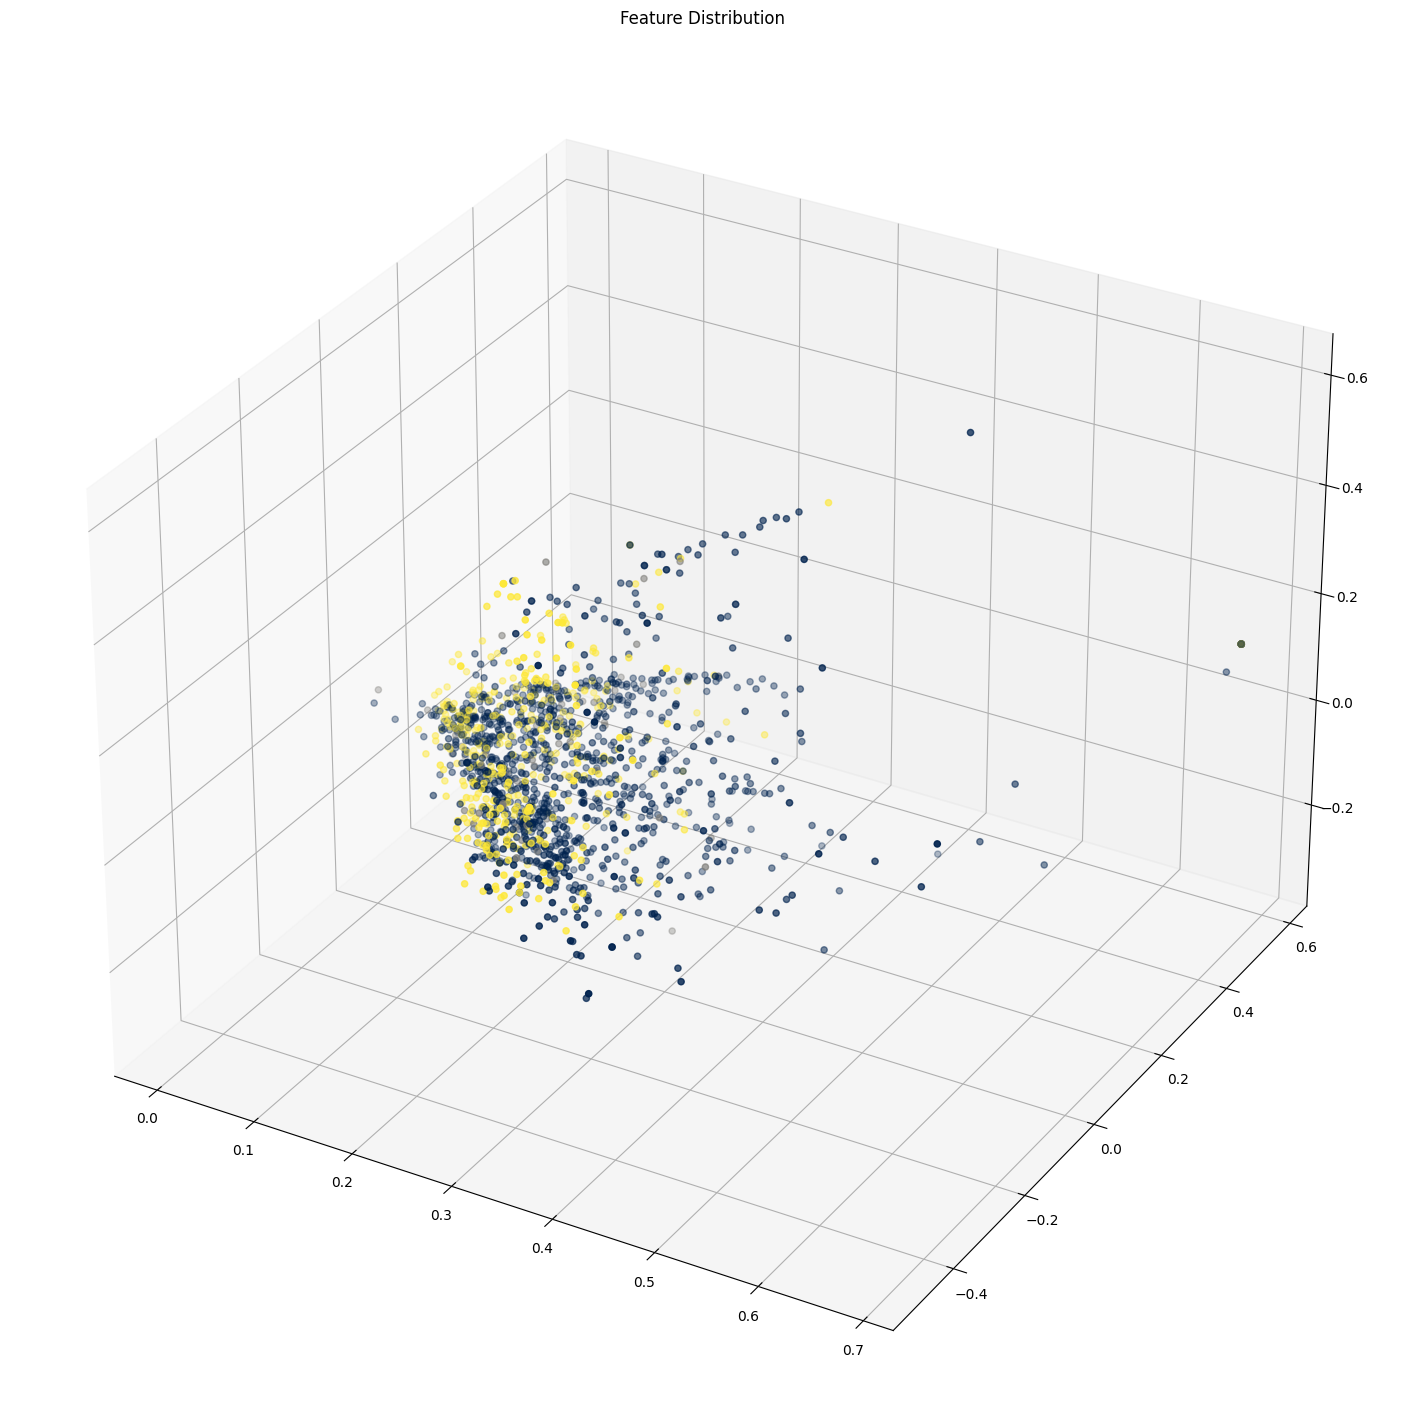

In [49]:
svd3 = TruncatedSVD(n_components=3)

X_transformed = svd3.fit_transform(X_train_tfidf)

fig = plt.figure(figsize=(22, 18))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_transformed[:, 0], X_transformed[:, 1], X_transformed[:, 2], c=y_train, cmap=plt.cm.cividis)
ax.set_title("Feature Distribution")
plt.show()
